In [8]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by cleaning, tokenizing, removing stop words, and lemmatizing."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Step 1: Load the dataset
train_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\train (1).csv")  # Replace with actual path
valid_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\dev (1).csv")  # Replace with actual path
test_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\test (2).csv")  # Replace with actual path

# Apply preprocessing to transcriptions
train_data['Processed_Text'] = train_data['transcriptions'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['transcriptions'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['transcriptions'].apply(preprocess_text)

# Step 2: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Text'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Text'])

# Step 3: Prepare labels
y_train = train_data['labels']
y_valid = valid_data['labels']

# Step 4: Train SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate the model on validation set
y_valid_pred = svm_model.predict(X_valid_tfidf)
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Step 6: Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_valid_tfidf, y_valid)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Step 7: Predict on test set
test_predictions = best_svm_model.predict(X_test_tfidf)

# Step 8: Save predictions
test_data['Predicted_Label'] = test_predictions
test_data[['image_id', 'Predicted_Label']].to_csv("meme_test_predictions.csv", index=False)

print("Predictions saved successfully.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Validation Accuracy: 0.7887323943661971
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       210
           1       0.75      0.28      0.41        74

    accuracy                           0.79       284
   macro avg       0.77      0.63      0.64       284
weighted avg       0.78      0.79      0.75       284

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Predictions saved successfully.


In [9]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by cleaning, tokenizing, removing stop words, and lemmatizing."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Step 1: Load the dataset
train_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\train (1).csv")  
valid_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\dev (1).csv")  
test_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\test (2).csv")  

# Apply preprocessing to transcriptions
train_data['Processed_Text'] = train_data['transcriptions'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['transcriptions'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['transcriptions'].apply(preprocess_text)

# Step 2: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Text'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Text'])

# Step 3: Prepare labels
y_train = train_data['labels']
y_valid = valid_data['labels']

# Step 4: Train initial SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate the model on validation set
y_valid_pred = svm_model.predict(X_valid_tfidf)
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Step 6: Advanced Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Only relevant for RBF kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)

# Step 7: Predict on test set using the best model
test_predictions = best_svm_model.predict(X_test_tfidf)

# Step 8: Save predictions to Downloads directory
output_file = r"C:\Users\ARTHI\Downloads\meme_test_tamil.csv"
test_data['Predicted_Label'] = test_predictions
test_data[['image_id', 'Predicted_Label']].to_csv(output_file, index=False)

print(f"Predictions saved successfully to {output_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Validation Accuracy: 0.7887323943661971
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       210
           1       0.71      0.32      0.44        74

    accuracy                           0.79       284
   macro avg       0.75      0.64      0.66       284
weighted avg       0.78      0.79      0.76       284

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Predictions saved successfully to C:\Users\ARTHI\Downloads\meme_test_tamil.csv


In [10]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by cleaning, tokenizing, removing stop words, and lemmatizing."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Step 1: Load the dataset
train_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\train (1).csv")  
valid_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\dev (1).csv")  
test_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\test (2).csv")  

# Apply preprocessing to transcriptions
train_data['Processed_Text'] = train_data['transcriptions'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['transcriptions'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['transcriptions'].apply(preprocess_text)

# Step 2: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Text'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Text'])

# Step 3: Prepare labels
y_train = train_data['labels']
y_valid = valid_data['labels']

# Step 4: Train initial SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate the model on validation set
y_valid_pred = svm_model.predict(X_valid_tfidf)
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Step 6: Advanced Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Only relevant for RBF kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)

# Step 7: Predict on test set using the best model
test_predictions = best_svm_model.predict(X_test_tfidf)

# Step 8: Save predictions to Downloads directory
output_file = r"C:\Users\ARTHI\Downloads\meme_test_tamil.csv"
test_data['Predicted_Label'] = test_predictions
test_data[['image_id', 'Predicted_Label']].to_csv(output_file, index=False)

print(f"Predictions saved successfully to {output_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Validation Accuracy: 0.7887323943661971
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       210
           1       0.71      0.32      0.44        74

    accuracy                           0.79       284
   macro avg       0.75      0.64      0.66       284
weighted avg       0.78      0.79      0.76       284

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Predictions saved successfully to C:\Users\ARTHI\Downloads\meme_test_tamil.csv


In [28]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-misogynistic', 'Misogynistic'],
                yticklabels=['Non-misogynistic', 'Misogynistic'], cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

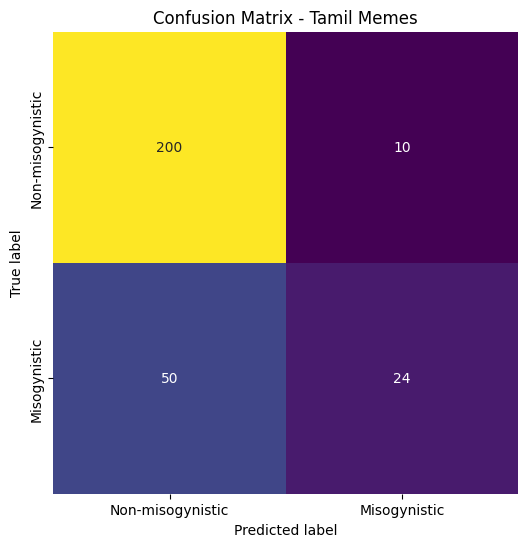

In [29]:
plot_confusion_matrix(y_valid, y_valid_pred, "Tamil Memes")


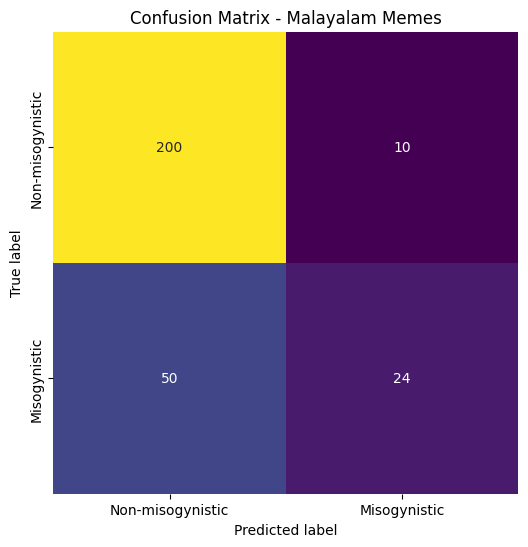

In [30]:
plot_confusion_matrix(y_valid, y_valid_pred, "Malayalam Memes")

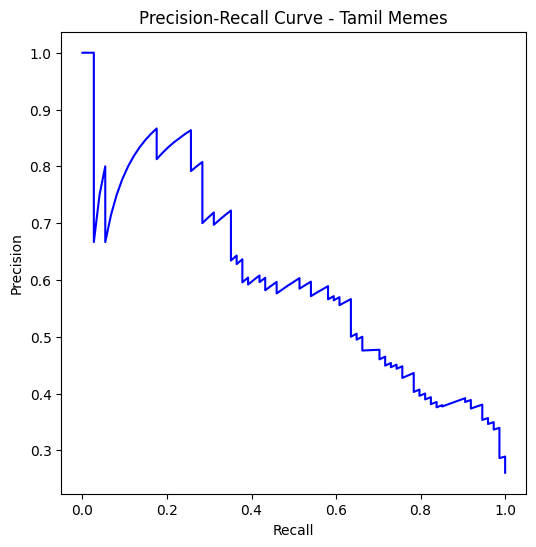

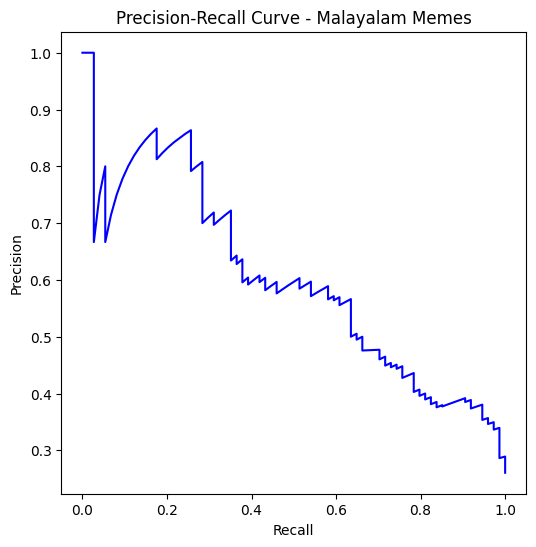

In [40]:
# Corrected Precision-Recall Curve Plotting Function
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='b')
    plt.title(f"Precision-Recall Curve - {title}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# Get probabilities for Precision-Recall Curve
y_valid_prob_tamil = best_svm_model.decision_function(X_valid_tfidf)  # Get decision function values (SVM)
plot_precision_recall_curve(y_valid, y_valid_prob_tamil, "Tamil Memes")

y_valid_prob_malayalam = best_svm_model.decision_function(X_valid_tfidf)  # Get decision function values (SVM)
plot_precision_recall_curve(y_valid, y_valid_prob_malayalam, "Malayalam Memes")


In [55]:
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='red', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get probabilities for ROC Curve (use decision function for SVM)
plot_roc_curve(y_valid, y_valid_prob_tamil, "Tamil Memes")
plot_roc_curve(y_valid, y_valid_prob_malayalam, "Malayalam Memes")

ValueError: Found input variables with inconsistent numbers of samples: [160, 284]

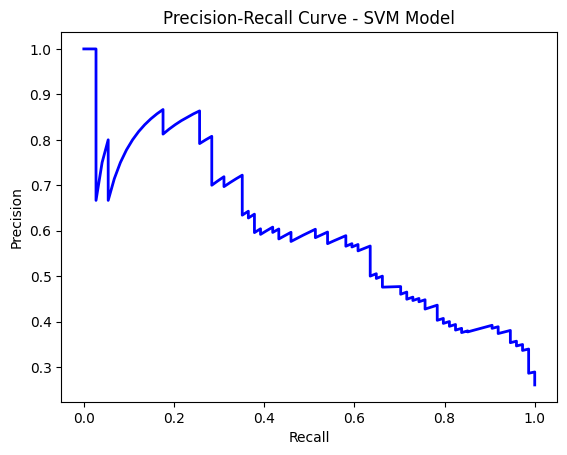

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Visualization after model evaluation
def visualize_model_evaluation(y_true, y_pred, y_prob, model_name):
    """Visualize Confusion Matrix, ROC Curve, and Precision-Recall Curve."""
   

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

# Example Usage
y_valid_pred = svm_model.predict(X_valid_tfidf)
y_valid_prob = svm_model.decision_function(X_valid_tfidf)  # Use decision_function for SVC
visualize_model_evaluation(y_valid, y_valid_pred, y_valid_prob, "SVM Model")


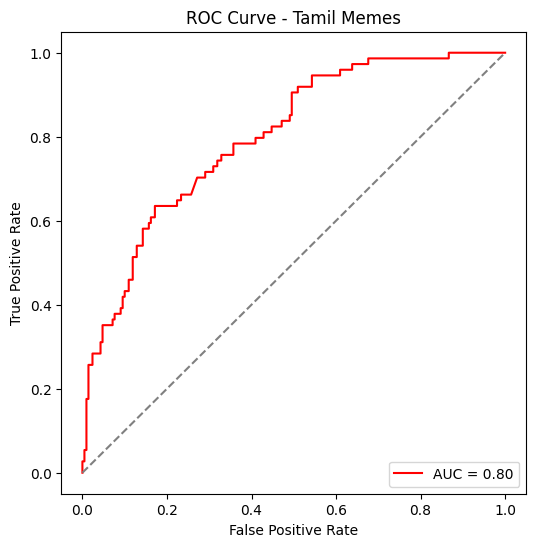

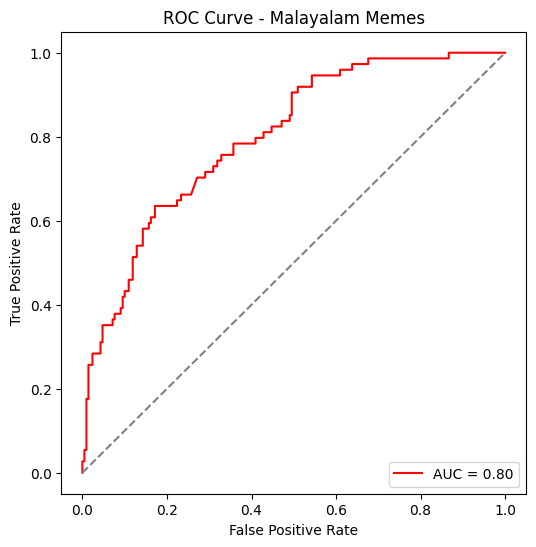

In [45]:
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='red', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get probabilities for ROC Curve (use decision function for SVM)
plot_roc_curve(y_valid, y_valid_prob_tamil, "Tamil Memes")
plot_roc_curve(y_valid, y_valid_prob_malayalam, "Malayalam Memes")

In [46]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by cleaning, tokenizing, removing stop words, and lemmatizing."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Step 1: Load the dataset
train_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\train (3).csv")  
valid_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\dev (2).csv") 
test_data = pd.read_csv(r"C:\Users\ARTHI\Downloads\test (3).csv")  

# Apply preprocessing to transcriptions
train_data['Processed_Text'] = train_data['transcriptions'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['transcriptions'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['transcriptions'].apply(preprocess_text)

# Step 2: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Text'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Text'])

# Step 3: Prepare labels
y_train = train_data['labels']
y_valid = valid_data['labels']

# Step 4: Train initial SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate the model on validation set
y_valid_pred = svm_model.predict(X_valid_tfidf)
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Step 6: Advanced Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Only relevant for RBF kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)

# Step 7: Predict on test set using the best model
test_predictions = best_svm_model.predict(X_test_tfidf)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Validation Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78        97
           1       0.66      0.63      0.65        63

    accuracy                           0.73       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.72      0.72      0.72       160

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score

# Step 8: Evaluate on test set
y_test_pred = best_svm_model.predict(X_test_tfidf)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-misogynistic", "Misogynistic"], yticklabels=["Non-misogynistic", "Misogynistic"])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Confusion Matrix for Tamil
plot_confusion_matrix(y_valid, y_test_pred, "Confusion Matrix for Tamil Memes")

# Classification Report
print("Classification Report:\n", classification_report(y_valid, y_test_pred))

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_prob, title="Precision-Recall Curve"):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='b')
    plt.title(f"Precision-Recall Curve - {title}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# Get probabilities for Precision-Recall Curve (SVM uses decision_function for distance)
y_valid_prob = best_svm_model.decision_function(X_valid_tfidf)

# Plot Precision-Recall Curve
plot_precision_recall_curve(y_valid, y_valid_prob, "Tamil Memes")

# ROC Curve
def plot_roc_curve(y_true, y_pred_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"Receiver Operating Characteristic - {title}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC Curve
plot_roc_curve(y_valid, y_valid_prob, "Tamil Memes")

# AUC Score
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


ValueError: Found input variables with inconsistent numbers of samples: [160, 200]

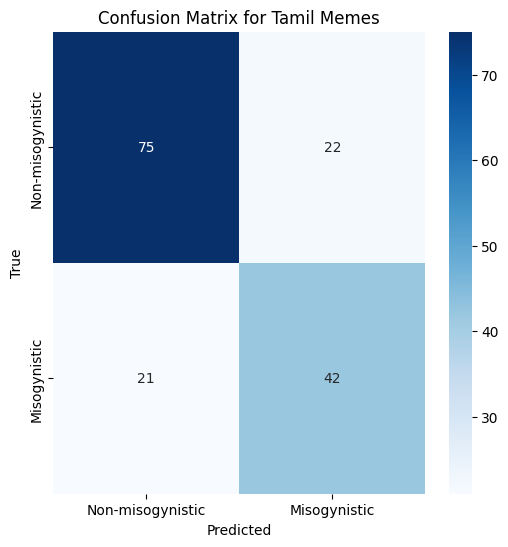

In [50]:
# Ensure that y_valid and y_valid_pred (or probabilities) have the same number of samples
y_valid_pred = best_svm_model.predict(X_valid_tfidf)  # SVM prediction
y_valid_prob = best_svm_model.decision_function(X_valid_tfidf)  # Decision function values

# Confusion Matrix
plot_confusion_matrix(y_valid, y_valid_pred, "Confusion Matrix for Tamil Memes")



In [51]:

# Classification Report
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        97
           1       0.66      0.67      0.66        63

    accuracy                           0.73       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.73      0.73      0.73       160



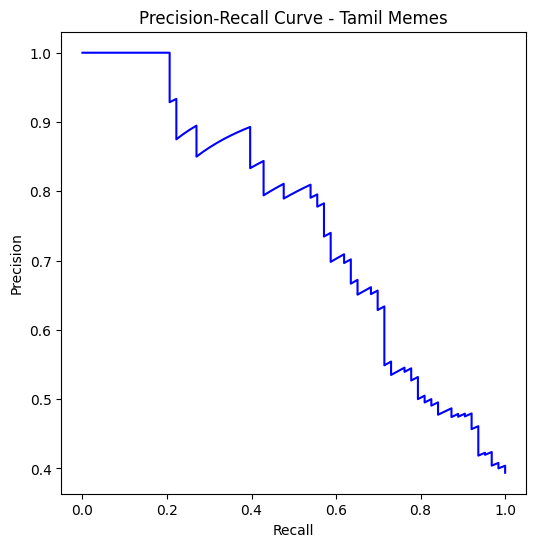

In [52]:
# Precision-Recall Curve
plot_precision_recall_curve(y_valid, y_valid_prob, "Tamil Memes")



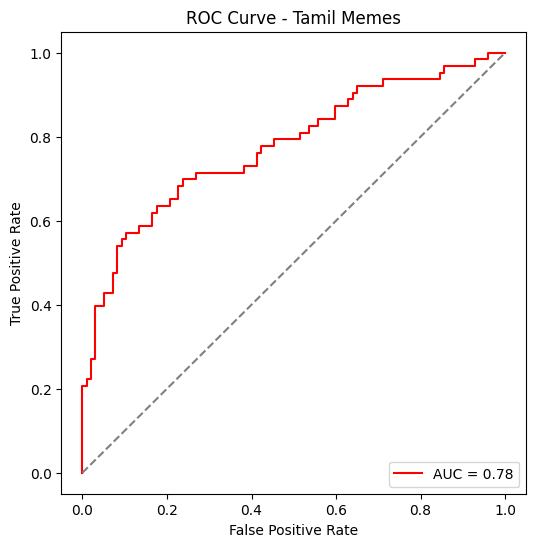

AUC: 0.78


In [53]:
# ROC Curve
plot_roc_curve(y_valid, y_valid_prob, "Tamil Memes")

# AUC Score
fpr, tpr, _ = roc_curve(y_valid, y_valid_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")